# 데이터 처리

In [1]:
import pandas as pd
data = pd.read_csv('merged_user_data_v3.csv',encoding='utf-8')

In [2]:
print(data.head())
print(data.info())
print(data.describe())

   user_id  level user_info product_option  total_purchase_amount  \
0   !!??!?      3        남성           NONE                 453200   
1  !!ㅇㅈㅁ!!      4        여성           FREE                1122090   
2    !i!i!      6        남성           FREE                 412050   
3    !•c•!      5        남성           FREE                1148530   
4    !ㅇㅁㅇ!      7        여성              L                1730960   

   average_purchase_amount  unique_brands  \
0                    34861              5   
1                    51004             15   
2                    37459             10   
3                    63807             11   
4                    64109             16   

                                  unique_brands_list  average_review_length  \
0                        로토토베베, 꿈비, 루솔, 슬로우애시드, 그로미미                     58   
1  아카이브 볼드, 해비즘, 바닐라코, 더 아이덴티티 프로젝트, 뉴발란스, 에뛰드, 도...                     44   
2  무신사 스탠다드, 와일드 브릭스, 인템포무드, 후브스, 시글락, 시그니처, 디미트리...                     88  

In [5]:
data.drop('churn_1_month',axis=1,inplace=True)
data.drop('churn_6_months',axis=1,inplace=True)
data.drop('unique_brands_list',axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['user_info'] = le.fit_transform(data['user_info'])

In [9]:
data['churn_3_months'] = data['churn_3_months'].astype('category').cat.codes

In [11]:
data=data[data['count']>=10]

### talk

In [16]:
df1=pd.read_csv('../crawl/talks/user_post_info.csv',encoding='utf-8')
merged_df = data.merge(df1, on='hash_id', how='left')

# Define the new column based on the conditions
merged_df['talk'] = (merged_df['post_count'].fillna(0) > 0) | (merged_df['comment_count'].fillna(0) > 0)

# Fill NaN values in the new column with False (for hash_id not present in df1)
merged_df['talk'] = merged_df['talk'].fillna(False)

# Drop the columns added from df1 to clean up the dataframe
merged_df = merged_df.drop(columns=['post_count', 'comment_count'])

# Update df2 with the new column
data = data.merge(merged_df[['hash_id', 'talk']], on='hash_id', how='left')

In [18]:
import scipy.stats as stats

# Step 2: Initialize counters for the contingency table
bb_used_exit = 0  # Users who used the bulletin board and exited
bb_used_stayed = 0  # Users who used the bulletin board and stayed
no_bb_exit = 0  # Users who didn't use the bulletin board and exited
no_bb_stayed = 0  # Users who didn't use the bulletin board and stayed

# Step 3: Extract the relevant data from the file
# This is a mock example; adjust the parsing logic according to your file format
for i in range(len(data['talk'])):
    bb_usage = data.iloc[i,46]  # T/F indicating bulletin board usage
    exit_status = data.iloc[i,25]  # 0/1 indicating exit behavior
    
    if bb_usage == True:
        if exit_status == 1:
            bb_used_exit += 1
        else:
            bb_used_stayed += 1
    elif bb_usage == False:
        if exit_status == 1:
            no_bb_exit += 1
        else:
            no_bb_stayed += 1

# Step 4: Create a contingency table
contingency_table = [[bb_used_exit, bb_used_stayed], [no_bb_exit, no_bb_stayed]]

# Step 5: Perform the Chi-Square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Step 6: Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between bulletin board usage and exit behavior.")
else:
    print("Fail to reject the null hypothesis: No significant association between bulletin board usage and exit behavior.")

Chi-Square Statistic: 46.84864690741695
P-value: 7.668602611841768e-12
Reject the null hypothesis: There is a significant association between bulletin board usage and exit behavior.


### review keyword

In [20]:
keyword=pd.read_csv('review_similarity_keyword.csv',encoding='utf-8',index_col='Unnamed: 0')
keyword

,user_id,가볍다_sim,가성비_sim,감사하다_sim,고민_sim,괜찮다_sim,구매_sim,귀엽다_sim,기본_sim,길이_sim,...,추천_sim,코디_sim,퀄리티_sim,크다_sim,포인트_sim,포장_sim,만족_,좋다_,탄탄하다_,편하다_
0,!!??!?,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,!!ㅇㅈㅁ!!,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,!i!i!,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,!•c•!,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,!ㅇㅁㅇ!,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38391,힣헿훟힣,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38392,劉 周 城,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
38393,柳,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
38394,｡｡,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
numeric_df = keyword.select_dtypes(include='number')
counts = numeric_df.sum()
sorted_columns = counts.sort_values(ascending=False)

for column, count in sorted_columns.items():
    print(f"{column}: {count}")

# If you need the column names as a list
sorted_columns_list = sorted_columns.index.tolist()
print("\nSorted column names:", sorted_columns_list)

느낌_sim: 26799
예쁘다_sim: 22116
사다_sim: 19191
코디_sim: 13100
생각_sim: 10913
좋다_: 10384
귀엽다_sim: 3811
구매_sim: 2792
괜찮다_sim: 2651
살짝_sim: 850
입다_sim: 478
편하다_: 404
만족_: 389
디자인_sim: 202
사이즈_sim: 190
바지_sim: 106
쓰다_sim: 105
퀄리티_sim: 100
신다_sim: 89
셔츠_sim: 68
감사하다_sim: 47
최고_sim: 47
추천_sim: 43
착용_sim: 41
선물_sim: 39
무난_sim: 35
가성비_sim: 24
기본_sim: 15
두껍다_sim: 12
어울리다_sim: 12
크다_sim: 11
원하다_sim: 10
사용_sim: 10
상품_sim: 9
깔끔하다_sim: 7
따뜻하다_sim: 6
싸다_sim: 6
스타일_sim: 5
길이_sim: 4
원단_sim: 4
사진_sim: 4
아쉽다_sim: 4
배송_sim: 3
요즘_sim: 3
여자_sim: 3
추워지다_sim: 3
소재_sim: 3
포인트_sim: 3
탄탄하다_: 3
제품_sim: 3
처음_sim: 2
적당하다_sim: 2
가볍다_sim: 2
신발_sim: 2
두께_sim: 2
재질_sim: 1
자주_sim: 1
넉넉하다_sim: 1
얇다_sim: 1
세탁_sim: 1
색깔_sim: 1
딱이다_sim: 1
모자_sim: 1
포장_sim: 1
고민_sim: 1
빠르다_sim: 1
블랙_sim: 1
믿다_sim: 1

Sorted column names: ['느낌_sim', '예쁘다_sim', '사다_sim', '코디_sim', '생각_sim', '좋다_', '귀엽다_sim', '구매_sim', '괜찮다_sim', '살짝_sim', '입다_sim', '편하다_', '만족_', '디자인_sim', '사이즈_sim', '바지_sim', '쓰다_sim', '퀄리티_sim', '신다_sim', '셔츠_sim', '감사하다_sim', '

In [24]:
data=pd.merge(data, keyword[['user_id','느낌_sim', '예쁘다_sim','코디_sim', '좋다_', '귀엽다_sim', '구매_sim', '괜찮다_sim',
                             '살짝_sim', '편하다_', '만족_', '퀄리티_sim','최고_sim']], on='user_id', how='left')

In [26]:
data.columns

Index(['user_id', 'level', 'user_info', 'product_option',
       'total_purchase_amount', 'average_purchase_amount', 'unique_brands',
       'average_review_length', 'helpful_count', 'hash_id', 'star_rating',
       'total_category_counts', 'count_apparel', 'count_shoes_bags',
       'count_accessories_beauty', 'count_etc', 'ratio_apparel',
       'ratio_shoes_bags', 'ratio_accessories_beauty', 'ratio_etc', 'count',
       'average_purchase_cycle_total', 'average_purchase_cycle_unique',
       'most_recent_review_date', 'days_since_last_review', 'churn_3_months',
       'mean_review_interval', 'count_reviews_in_autumn',
       'count_reviews_in_spring', 'count_reviews_in_summer',
       'count_reviews_in_winter', 'ratio_reviews_in_spring',
       'ratio_reviews_in_summer', 'ratio_reviews_in_autumn',
       'ratio_reviews_in_winter', 'total_spending', 'recent_3m_spending',
       'previous_3m_spending', 'purchase_trend', 'purchase_diff',
       'purchase_trend_info', 'recent_3m_reviews'

# method1. grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

X = data.drop(columns=['user_id','product_option','average_purchase_amount','hash_id','count',
                       'most_recent_review_date',
                       'count_reviews_in_autumn', 'count_reviews_in_spring','count_reviews_in_summer', 'count_reviews_in_winter',
                       'days_since_last_review',

        'total_category_counts', 'count_apparel', 'count_shoes_bags',
       'count_accessories_beauty', 'count_etc', 'ratio_apparel','ratio_shoes_bags',
                       
                       'purchase_trend', 'purchase_diff','previous_3m_reviews', 'review_count_diff',
                       'purchase_trend_info','review_trend_info',
                       '느낌_sim', '예쁘다_sim', '코디_sim', '귀엽다_sim', '괜찮다_sim', '살짝_sim', '편하다_',
                       'churn_3_months'])

y = data['churn_3_months']

# Remove whitespaces in feature names
X.columns = X.columns.str.replace(' ', '_')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN to the training set only
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

param_grid = {
    'num_leaves': [31, 50, 70],  # Number of leaves in full tree
    'max_depth': [-1, 10, 20],  # -1 means no limit
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],  # Number of boosting iterations
    'min_child_samples': [10, 20, 30],  # Minimum number of samples per leaf
    'feature_fraction': [0.7, 0.8, 0.9]  # Fraction of features to use for each iteration
}

# Initialize LGBMClassifier
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Predict using the best model
y_pred = best_model.predict(X_test)

y_pred_binary = (y_proba > optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

tn, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)
print(f'Specificity: {specificity:.4f}')

# method2. modeling process

In [28]:
data = data.fillna(0)

In [736]:
#data.to_csv('user_data_f.csv',encoding='utf-8-sig')

In [879]:
data.columns

Index(['user_id', 'level', 'user_info', 'product_option',
       'total_purchase_amount', 'average_purchase_amount', 'unique_brands',
       'average_review_length', 'helpful_count', 'hash_id', 'star_rating',
       'total_category_counts', 'count_apparel', 'count_shoes_bags',
       'count_accessories_beauty', 'count_etc', 'ratio_apparel',
       'ratio_shoes_bags', 'ratio_accessories_beauty', 'ratio_etc', 'count',
       'average_purchase_cycle_total', 'average_purchase_cycle_unique',
       'most_recent_review_date', 'days_since_last_review', 'churn_3_months',
       'mean_review_interval', 'count_reviews_in_autumn',
       'count_reviews_in_spring', 'count_reviews_in_summer',
       'count_reviews_in_winter', 'ratio_reviews_in_spring',
       'ratio_reviews_in_summer', 'ratio_reviews_in_autumn',
       'ratio_reviews_in_winter', 'total_spending', 'recent_3m_spending',
       'previous_3m_spending', 'purchase_trend', 'purchase_diff',
       'purchase_trend_info', 'recent_3m_reviews'

In [34]:
len(X.columns)

27

In [30]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

X = data.drop(columns=['user_id','product_option','average_purchase_amount','hash_id','count',
                       'most_recent_review_date',
                       'count_reviews_in_autumn', 'count_reviews_in_spring','count_reviews_in_summer', 'count_reviews_in_winter',
                       'days_since_last_review',

        'total_category_counts', 'count_apparel', 'count_shoes_bags',
       'count_accessories_beauty', 'count_etc', 'ratio_apparel','ratio_shoes_bags',
                       
                       'purchase_trend', 'purchase_diff','previous_3m_reviews', 'review_count_diff',
                       'purchase_trend_info','review_trend_info',
                       '느낌_sim', '예쁘다_sim', '코디_sim', '귀엽다_sim', '괜찮다_sim', '살짝_sim', '편하다_',
                       'churn_3_months'])

y = data['churn_3_months']

# Remove whitespaces in feature names
X.columns = X.columns.str.replace(' ', '_')

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

##### 예측 확률을 사용하여 Precision-Recall 커브와 F1 점수를 계산하고 최적의 임계값을 찾는 과정

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[200]	test's binary_logloss: 0.338807
Optimal Threshold: 0.45040293679683185
Best F1 Score: 0.8453081621321488


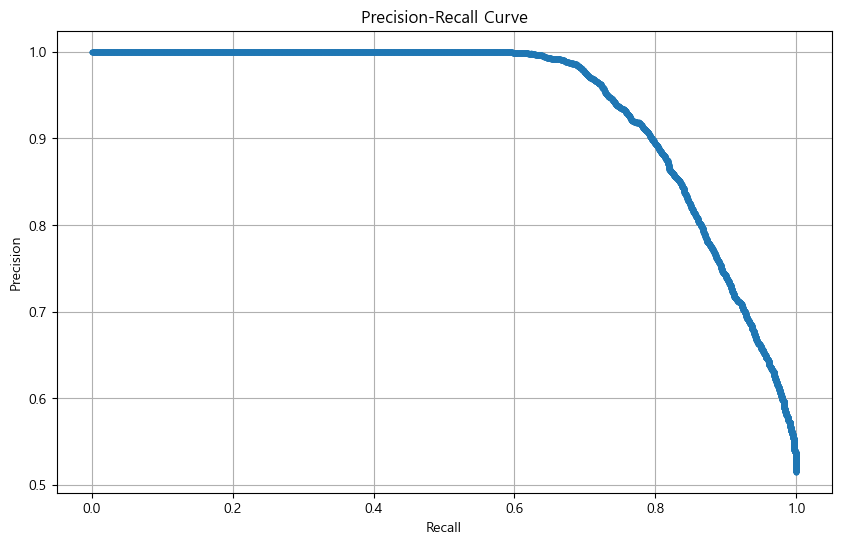

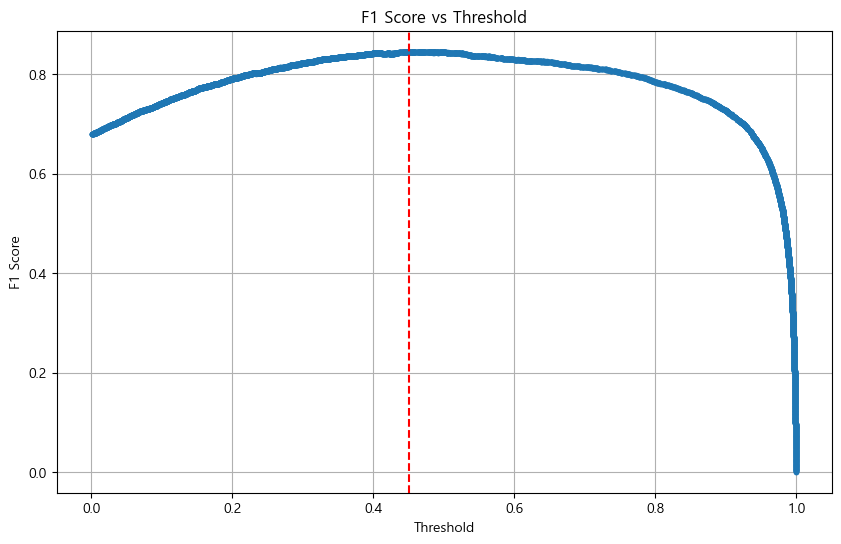

In [1077]:
import numpy as np
import matplotlib.pyplot as plt

params = {
    'objective': 'binary',  # 이진 분류 문제
    'metric': 'binary_logloss',  # 로그 손실 함수 사용
    'boosting_type': 'gbdt',  # 그래디언트 부스팅 결정 트리 사용
    'num_leaves': 70,  # 리프 노드의 최대 수
    'learning_rate': 0.1,  # 학습률
    'max_depth': -1,  # 트리의 최대 깊이, -1은 제한 없음
    'min_child_samples': 50,  # 리프 노드가 되기 위한 최소한의 데이터 수
    'feature_fraction': 0.9,  # 각 부스팅 단계에서 사용되는 특성의 비율
    'bagging_fraction': 0.9,
    'verbose': 0,  # 출력 메시지 수준
    'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # 클래스 불균형을 위한 가중치 조정
    'lambda_l1': 0.1,  # L1 정규화, 과적합 방지
    'lambda_l2': 0.2,  # L2 정규화, 과적합 방지
}

gbm = lgb.train(params,
                train_data,
                num_boost_round=200,  # 부스팅 반복 횟수
                valid_sets=[test_data],  # 검증 데이터 셋
                valid_names=['test'],
                callbacks=[lgb.early_stopping(10)])  # 조기 종료 기준: 10 라운드 동안 성능 향상 없을 시 종료

# Predict probabilities
y_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration, predict_disable_shape_check=True)

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores[np.isnan(f1_scores)] = 0  # Replace NaN values with 0

# Find the threshold that gives the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Print the optimal threshold and corresponding F1 score
print(f'Optimal Threshold: {optimal_threshold}')
print(f'Best F1 Score: {f1_scores[optimal_idx]}')

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot F1 Score vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], marker='.')
plt.axvline(optimal_threshold, color='red', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.show()

In [1078]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

y_pred_binary = (y_proba > optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

tn, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)
print(f'Specificity: {specificity:.4f}')

Accuracy: 0.8465433729634523
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      4404
           1       0.88      0.81      0.85      4680

    accuracy                           0.85      9084
   macro avg       0.85      0.85      0.85      9084
weighted avg       0.85      0.85      0.85      9084

Confusion Matrix:
 [[3885  519]
 [ 875 3805]]
Specificity: 0.8822


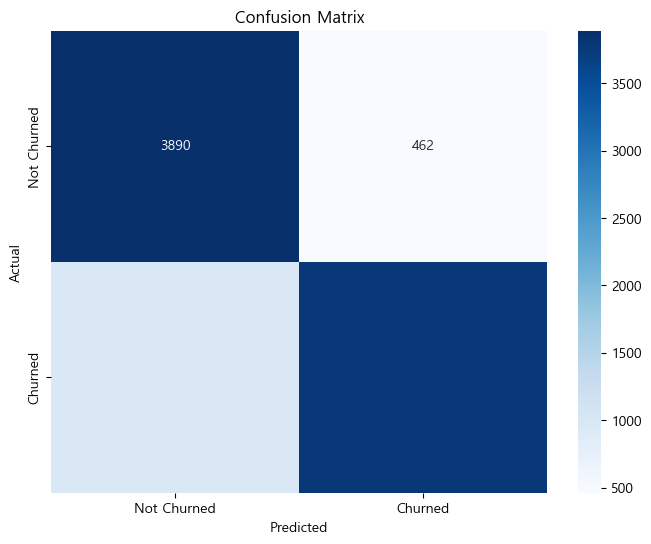

In [729]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
importances = gbm.feature_importance()
feature_names = X_train.columns


In [733]:
# 아이디 입력하면 이탈 확률 출력
def check_user_deviance(user_id, data, model, optimal_threshold):
    # Find the user in the data
    user_data = data[data['user_id'] == user_id]
    
    if user_data.empty:
        return f"User ID {user_id} not found in the data."

    # Drop columns that are not used in the model
    features = user_data.drop(columns=['user_id','product_option','average_purchase_amount','hash_id','count',
                       'most_recent_review_date',
                       'count_reviews_in_autumn', 'count_reviews_in_spring',
                       'count_reviews_in_summer', 'count_reviews_in_winter','days_since_last_review',
                       'total_category_counts', 'count_apparel', 'count_shoes_bags',
                       'count_accessories_beauty', 'count_etc','purchase_trend_info','review_trend_info',
                       '느낌_sim', '예쁘다_sim', '코디_sim', '귀엽다_sim', '괜찮다_sim', '살짝_sim', '편하다_',
                       'churn_3_months'])
    # Remove whitespaces in feature names
    features.columns = features.columns.str.replace(' ', '_')
    
    # Predict the probability
    probability = model.predict(features, num_iteration=model.best_iteration)
    
    # Check if the user is a deviant
    is_deviant = probability > optimal_threshold
    
    return {
        'user_id': user_id,
        'probability_of_churn': probability[0],
        'churn': bool(is_deviant[0])
    }

# Example usage
user_id_to_check = input('user id : ')
result = check_user_deviance(user_id_to_check, data, gbm, optimal_threshold)
print(result)

user id :  !안녕하세용!


{'user_id': '!안녕하세용!', 'probability_of_churn': 0.11917345604375155, 'churn': False}


In [735]:
from tqdm import tqdm
churn_pro=[]
churn_result=[]
for i in tqdm(data['user_id']):
    result = check_user_deviance(i, data, gbm, optimal_threshold)
    churn_pro.append(result['probability_of_churn'])
    churn_result.append(result['churn'])

100%|███████████████████████████████████████████████████████████████████████████| 28969/28969 [03:51<00:00, 125.40it/s]


In [1165]:
X.columns

Index(['level', 'user_info', 'total_purchase_amount', 'unique_brands',
       'average_review_length', 'helpful_count', 'star_rating',
       'ratio_accessories_beauty', 'ratio_etc', 'average_purchase_cycle_total',
       'average_purchase_cycle_unique', 'mean_review_interval',
       'ratio_reviews_in_spring', 'ratio_reviews_in_summer',
       'ratio_reviews_in_autumn', 'ratio_reviews_in_winter', 'total_spending',
       'recent_3m_spending', 'previous_3m_spending', 'recent_3m_reviews',
       'review_trend', 'talk', '좋다_', '구매_sim', '만족_', '퀄리티_sim', '최고_sim'],
      dtype='object')

In [1211]:
df_result=pd.DataFrame({'user_id':data['user_id'],'hash_id':data['hash_id'],'probability':churn_pro,'churn':churn_result})
df_result['talk']=data['talk']
df_result['좋다_']=data['좋다_']
df_result['구매_sim']=data['구매_sim']
df_result['만족_']=data['만족_']
df_result['퀄리티_sim']=data['퀄리티_sim']
df_result['최고_sim']=data['최고_sim']
df_result['ratio_reviews_in_spring']=data['ratio_reviews_in_spring']
df_result['ratio_reviews_in_summer']=data['ratio_reviews_in_summer']
df_result['ratio_reviews_in_autumn']=data['ratio_reviews_in_autumn']
df_result['ratio_reviews_in_winter']=data['ratio_reviews_in_winter']


df_result

,user_id,hash_id,probability,churn,talk,좋다_,구매_sim,만족_,퀄리티_sim,최고_sim,ratio_reviews_in_spring,ratio_reviews_in_summer,ratio_reviews_in_autumn,ratio_reviews_in_winter
0,!!??!?,233181189d605b329f38733024dc0063,0.544370,True,False,0,1,0,0,0,0.62,0.00,0.38,0.00
1,!!ㅇㅈㅁ!!,99574099d1f8cc0f4b6bbb0d4d2ff23c,0.367128,False,False,0,0,0,0,0,0.00,0.00,0.27,0.73
2,!i!i!,43af2a81116e1b648bd338da1ad35622,0.585533,True,False,0,0,0,0,0,0.27,0.00,0.73,0.00
3,!•c•!,b73aeb4eae2681743842034bb6d88afa,0.438767,False,False,0,0,0,0,0,0.33,0.11,0.33,0.22
4,!ㅇㅁㅇ!,a0d5ef0092597c579d62587d9619b314,0.249318,False,False,0,0,0,0,0,0.63,0.37,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28964,힝힝항항홍홍,25a643943f7e02eb64b64c2729f4be0f,0.177787,False,False,1,0,0,0,0,0.15,0.33,0.24,0.28
28965,힣헿훟힣,c1a5bd3c5d254fb29fc9b229db90a815,0.731973,True,False,0,0,0,0,0,0.00,0.25,0.75,0.00
28966,柳,6651f61bb73d37dea896c4a8d2fd380f,0.175699,False,True,0,0,0,0,0,0.29,0.18,0.08,0.45
28967,｡｡,948af1ae60d89122d53de05b5690f38a,0.391448,False,False,0,0,0,0,0,0.00,0.00,0.67,0.33


In [1121]:
len(df_result[df_result['churn']==True])

4423

In [1123]:
len(data[data['churn_3_months']==1])

6729

In [ ]:
#df_result.to_csv('user_model_result.csv',encoding='utf-8')

In [1125]:
len(df_result[(df_result['talk'] == True) & (df_result['churn'] == False)])

1882

In [1139]:
tt=df_result[(df_result['talk'] == True) & (df_result['churn'] == True)]
len(tt)

234

In [1137]:
df_talk=pd.read_csv('crawl/talks/hashid_talks.csv',encoding='utf-8')
#df_talk = df_talk[df_talk['hashid'].isin(list(tt['hash_id']))]

import ast

def extract_subjects(category_str):
    # Convert the string to a list of dictionaries
    category_list = ast.literal_eval(f'[{category_str}]')
    # Extract the subject values
    subjects = [item['subject'] for item in category_list]
    # Join them into a single string
    return ', '.join(subjects)

# Apply the function to the 'category' column
df_talk['category'] = df_talk['category'].apply(extract_subjects)

from collections import Counter

def split_words(text):
    # Strip whitespace and split by comma
    return [word.strip().lower() for word in text.split(',')]

# Apply function to each row in the 'category' column and flatten the list of lists
words = df_talk['category'].apply(split_words).explode()

# Count word occurrences
word_counts = Counter(words)

# Convert to DataFrame for a more readable format
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
print(word_counts_df)

   Word  Count
1  도와줘요   4212
2  자유토크   2136
3  살까말까    275
5   이벤트    271
7  코디평가    223
0    공지    204
6  패션소식    133
4  최근소비     31
8  힙플핫플     14


In [ ]:
'ratio_reviews_in_spring', 'ratio_reviews_in_summer',
       'ratio_reviews_in_autumn', 'ratio_reviews_in_winter'

In [1241]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
correlation, p_value = pearsonr(df_result['ratio_reviews_in_autumn'], df_result['probability'])

print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

Pearson correlation coefficient: -0.07
P-value: 6.92e-32


In [1209]:
#'좋다_', '구매_sim','퀄리티_sim'
used_good_df = df_result[df_result['좋다_'] == 1]
not_used_good_df = df_result[df_result['좋다_'] == 0]
churn_rate_used_good = used_good_df['probability'].mean()
churn_rate_not_used_good = not_used_good_df['probability'].mean()
print(f"Churn rate for customers who used '좋다': {churn_rate_used_good:.2f}")
print(f"Churn rate for customers who did not use '좋다': {churn_rate_not_used_good:.2f}")
used_good_df = df_result[df_result['구매_sim'] == 1]
not_used_good_df = df_result[df_result['구매_sim'] == 0]
churn_rate_used_good = used_good_df['probability'].mean()
churn_rate_not_used_good = not_used_good_df['probability'].mean()
print(f"Churn rate for customers who used '구매': {churn_rate_used_good:.2f}")
print(f"Churn rate for customers who did not use '구매': {churn_rate_not_used_good:.2f}")
used_good_df = df_result[df_result['퀄리티_sim'] == 1]
not_used_good_df = df_result[df_result['퀄리티_sim'] == 0]
churn_rate_used_good = used_good_df['probability'].mean()
churn_rate_not_used_good = not_used_good_df['probability'].mean()
print(f"Churn rate for customers who used '퀄리티': {churn_rate_used_good:.2f}")
print(f"Churn rate for customers who did not use '퀄리티': {churn_rate_not_used_good:.2f}")
#'괜찮다_sim', '살짝_sim'
used_good_df = data[data['괜찮다_sim'] == 1]
not_used_good_df = data[data['괜찮다_sim'] == 0]
churn_rate_used_good = used_good_df['churn_3_months'].mean()
churn_rate_not_used_good = not_used_good_df['churn_3_months'].mean()
print(f"Churn rate for customers who used '괜찮다': {churn_rate_used_good:.2f}")
print(f"Churn rate for customers who did not use '괜찮다': {churn_rate_not_used_good:.2f}")
used_good_df = data[data['살짝_sim'] == 1]
not_used_good_df = data[data['살짝_sim'] == 0]
churn_rate_used_good = used_good_df['churn_3_months'].mean()
churn_rate_not_used_good = not_used_good_df['churn_3_months'].mean()
print(f"Churn rate for customers who used '살짝': {churn_rate_used_good:.2f}")
print(f"Churn rate for customers who did not use '살짝': {churn_rate_not_used_good:.2f}")

Churn rate for customers who used '괜찮다': 0.27
Churn rate for customers who did not use '괜찮다': 0.23
Churn rate for customers who used '살짝': 0.31
Churn rate for customers who did not use '살짝': 0.23


In [363]:
gbm.save_model('lightgbm_model.txt')

# 모델 분석

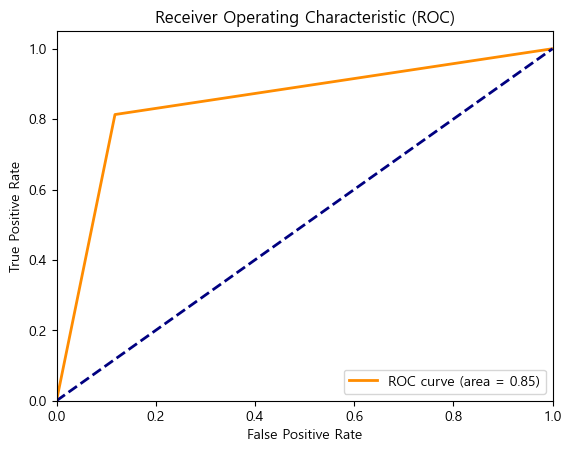

ROC AUC score: 0.85


In [1081]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_binary)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f'ROC AUC score: {roc_auc:.2f}')

In [400]:
from matplotlib import rc
rc("font", family="Malgun Gothic")

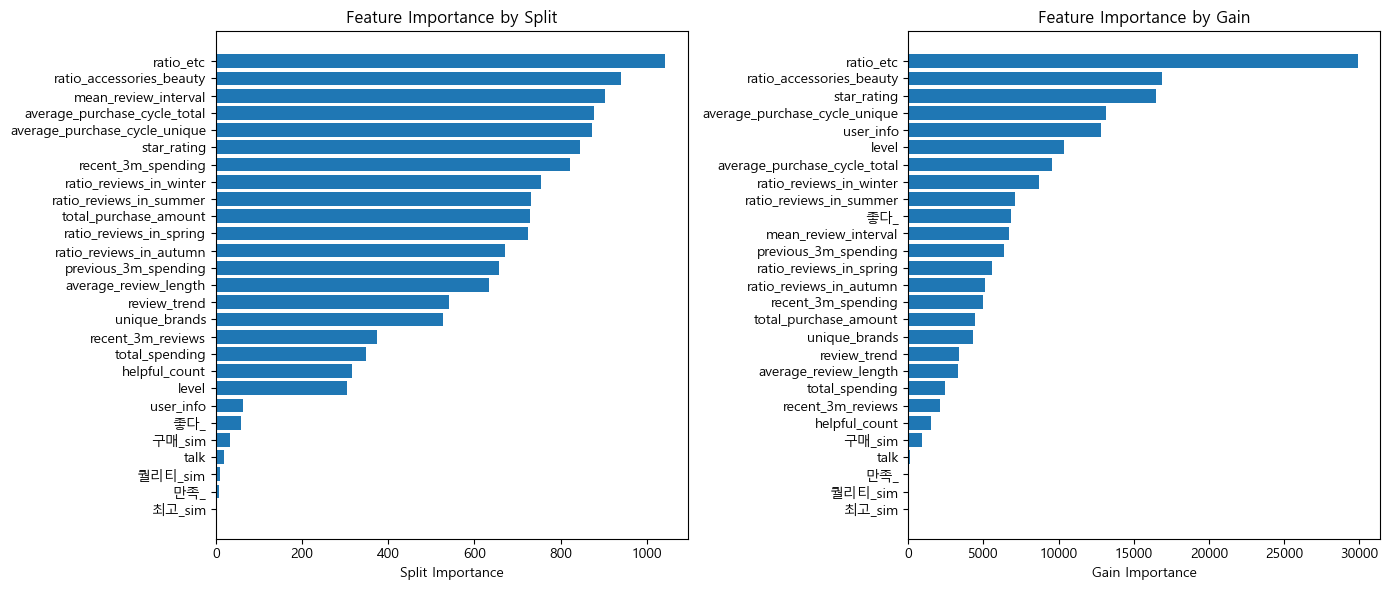

In [1083]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

# Assuming gbm is your trained model and X_train is your training data

# Split importance (default when calling feature_importance)
split_importance = gbm.feature_importance(importance_type='split')
# Gain importance
gain_importance = gbm.feature_importance(importance_type='gain')

# Get feature names
feature_names = X_train.columns

# Create dataframes for both types of importance
split_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': split_importance})
gain_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gain_importance})

# Sort by importance
split_importance_df_sorted = split_importance_df.sort_values(by='Importance', ascending=False)
gain_importance_df_sorted = gain_importance_df.sort_values(by='Importance', ascending=False)

# Plot for visual comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(split_importance_df_sorted['Feature'], split_importance_df_sorted['Importance'])
plt.xlabel('Split Importance')
plt.title('Feature Importance by Split')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(gain_importance_df_sorted['Feature'], gain_importance_df_sorted['Importance'])
plt.xlabel('Gain Importance')
plt.title('Feature Importance by Gain')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

#### split
- 모든 트리에서 데이터를 분할하는 데 기능이 사용되는 횟수를 측정합니다.
- 의사결정 과정에서 해당 기능이 얼마나 자주 사용되는지를 나타내는 발생 횟수입니다.
#### gain
- 특성이 모델에 가져오는 총 이득, 즉 분할에 특성을 사용할 때 목적 함수의 개선(예: 손실 감소)을 측정합니다.
- 특성이 기여하는 분할의 품질을 측정한 것으로, 모델 예측 개선에 대한 특성의 기여도에 따른 중요도를 반영합니다.

C:\Users\duwjd\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
C:\Users\duwjd\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  pl.tight_layout()
C:\Users\duwjd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


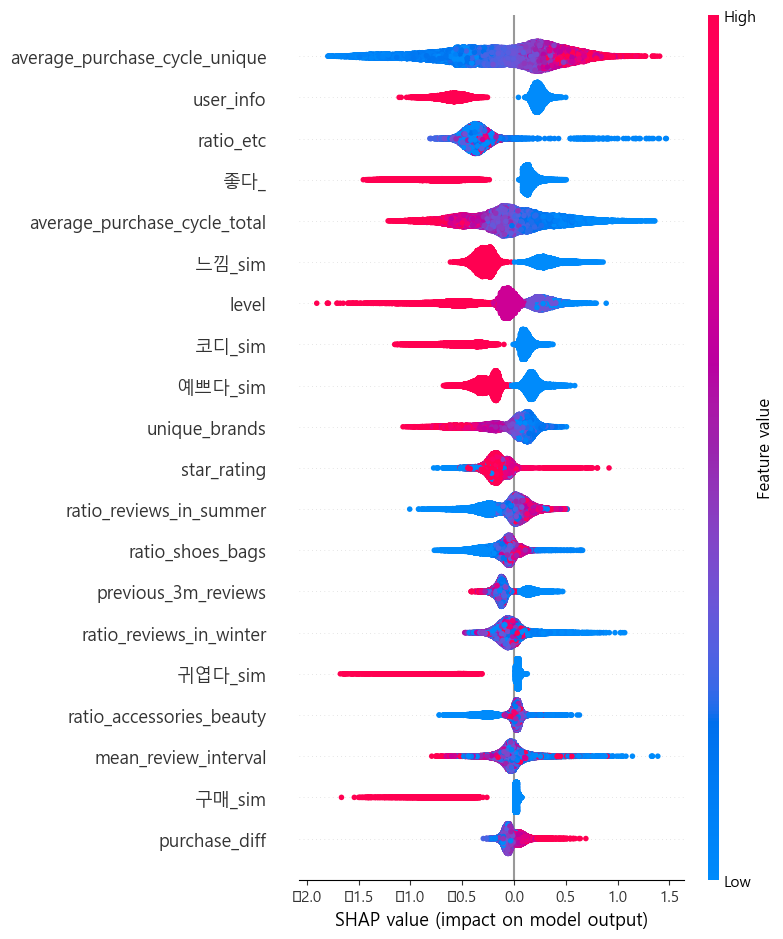

In [209]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

C:\Users\duwjd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


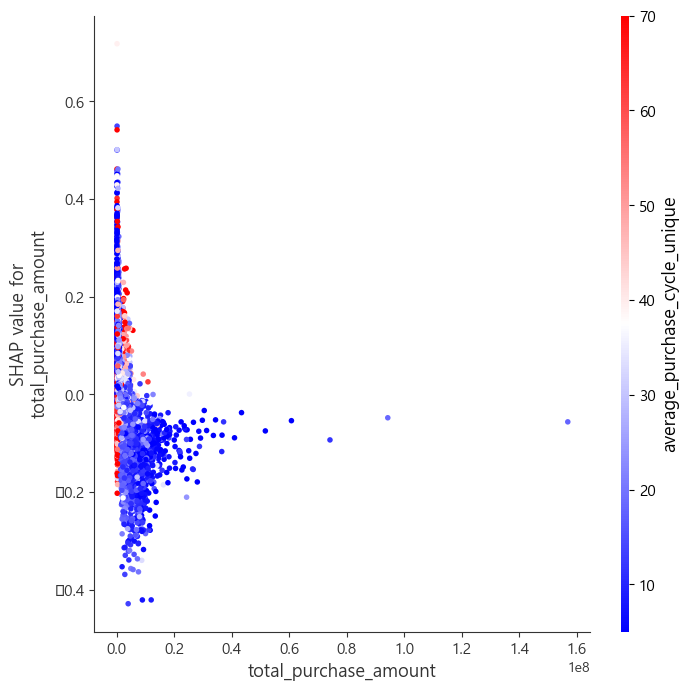

In [272]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
shap.dependence_plot(2, shap_values, X, 
                  ax = ax, ## 현재 좌표축
                  cmap = 'bwr' ## 컬러맵
                 )
 
ax.set_title('SHAP Dependence Plot', fontsize=20)
plt.show()

C:\Users\duwjd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


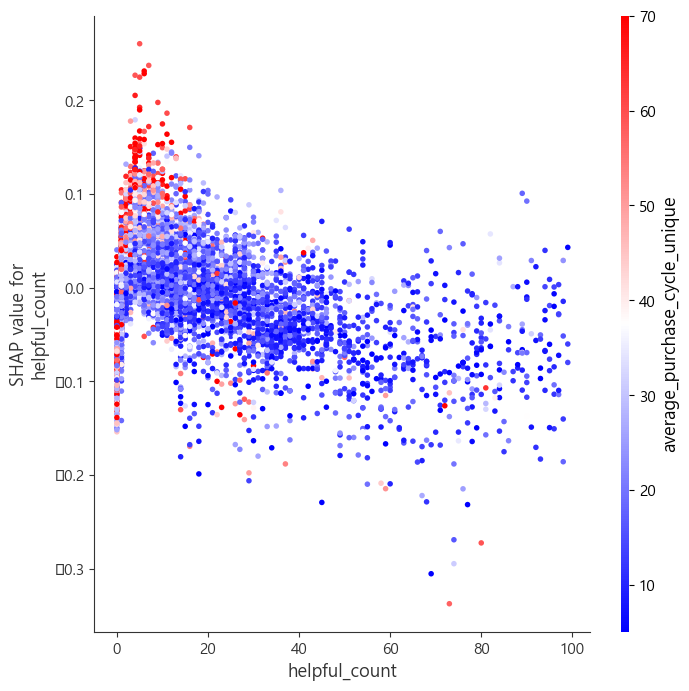

In [226]:
threshold = 100  # Example threshold; adjust as needed

# Filter the data where x-values are below the threshold
filtered_indices = np.where(X.iloc[:, 5] < threshold)[0]
filtered_shap_values = shap_values[filtered_indices]
filtered_X = X.iloc[filtered_indices, :]

# Create the plot
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()

shap.dependence_plot(
    5, filtered_shap_values, filtered_X,
    ax=ax,  # Current coordinate axis
    cmap='bwr'  # Colormap
)

ax.set_title('SHAP Dependence Plot', fontsize=20)
plt.show()

# 모델별 ROC

In [115]:
X = data.drop(columns=['user_id','product_option','average_purchase_amount','unique_brands_list','hash_id','count',
                       'most_recent_review_date',
                       'count_reviews_in_autumn', 'count_reviews_in_spring',
                       'count_reviews_in_summer', 'count_reviews_in_winter','days_since_last_review',
                       'total_category_counts', 'count_apparel', 'count_shoes_bags',
                       'count_accessories_beauty', 'count_etc',
                       'churn_3_months'])
y = data['churn_3_months']

# Remove whitespaces in feature names
X.columns = X.columns.str.replace(' ', '_')

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

# Define the models
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=0)))
models.append(('LightGBM', lgb.LGBMClassifier(random_state=0)))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('Naive Bayes', GaussianNB()))

# Initialize lists to store results
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation
for name, model in models:
    print(f"Start {name} in {model}")
    
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)    
    auc_results.append(cv_auc_results)    
    names.append(name)    
    model_results.loc[i] = [name,    
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)]
    
    i += 1

# Sort results by ROC AUC Mean
model_results_sorted = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)
print(model_results_sorted)


Start Logistic Regression in LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')
Start Random Forest in RandomForestClassifier(criterion='entropy', random_state=0)
Start XGBoost in XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)


C:\Users\duwjd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\duwjd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\duwjd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\duwjd\anaconda3\Lib\site-packages\

Start LightGBM in LGBMClassifier(random_state=0)
Start Decision Tree in DecisionTreeClassifier(criterion='entropy', random_state=0)
Start KNN in KNeighborsClassifier()
Start Naive Bayes in GaussianNB()
             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
2              XGBoost         91.13         0.46          83.87          0.69
3             LightGBM         90.89         0.48          83.72          0.64
1        Random Forest         88.91         0.53          80.80          0.70
4        Decision Tree         71.30         0.85          71.33          0.85
5                  KNN         65.29         0.93          61.90          0.69
6          Naive Bayes         58.87         0.50          53.76          0.61
0  Logistic Regression         53.13         0.57          49.35          0.73


In [116]:
model_results_sorted

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,XGBoost,91.13,0.46,83.87,0.69
3,LightGBM,90.89,0.48,83.72,0.64
1,Random Forest,88.91,0.53,80.80,0.70
4,Decision Tree,71.30,0.85,71.33,0.85
5,KNN,65.29,0.93,61.90,0.69
6,Naive Bayes,58.87,0.50,53.76,0.61
0,Logistic Regression,53.13,0.57,49.35,0.73
